In [1]:
# this file runs with a small sample of processed test data to demonstrate 
# 1. calculating mds embeddings from dissimilarity matrix
# 2. visualizing some of the data points

# running this notebook requires: buildings_dissimilarity_mat.csv, building_names.csv, 
# and scaled_buildings_dissimilarity_mat.csv to be in the same directory

# the data used here is generated in DissimilarityMat notebook which builds a few different
# dissimilarity matrices using files generated using SQL in DataPreprocessing

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import random

In [3]:
# function to return normalized data
def normalize_data(m):
    n = np.shape(m)[0]
    
    temp = m.flatten()
    temp = temp[temp != 0] # zeros are missing data not actually zeros
    mu = np.mean(temp)
    sigma = np.std(temp)
    
    # normalize data
    X = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if m[i][j] != 0:
                X[i][j] = (m[i][j] - mu)/sigma
    
    # return result
    return X, mu, sigma
 

In [4]:
# function to train model and return embeddings
def mds_embeddings(x):
    seed = np.random.RandomState(seed=3)
    mds = MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12, dissimilarity="precomputed", random_state=seed)
    pos = mds.fit_transform(x)
    return pos

In [5]:
# function to get array of colors of given length
def get_cmap(n):
    return plt.cm.get_cmap('hsv', n)

In [6]:
# function to scatter plot positions
# results: array of 2d arrays containing x,y coordinates for datapoints in each set
# labels: name for each set
# indices: 
# results and labels must be same length
def display_results(results, labels, indices):
    n = len(indices)
    # get enough colors
    colors = get_cmap(n)
    
    # set up for plots
    fig, ax = plt.subplots()
    
    # add each set in different color
    for i in range(n):
        index = indices[i]
        # sometimes have array and sometimes array of arrays
        if len(np.shape(results[0])) > 1:
            x = results[index][:,0]
            y = results[index][:,1]
            ax.scatter(x, y, color=colors(i), label=labels[index])
        else:
            x = results[index][0]
            y = results[index][1]
            ax.scatter(x, y, color=colors(i), label=labels[index])
            ax.annotate(labels[index], (x, y))
        
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

In [7]:
# Test on dissimilarity matrix with buildings

# import ds matrix
buildings_ds_mat = np.genfromtxt('buildings_dissimilarity_mat.csv', delimiter=',')

n = np.shape(buildings_ds_mat)[0]

# import list of building names
building_names = []
with open('building_names.csv', 'r') as f:
    for line in f.readlines():
        l = line.strip()
        building_names.append(l)

In [8]:
# normalize data
x, u, s = normalize_data(buildings_ds_mat)

In [9]:
# train
test_embeddings = mds_embeddings(x)

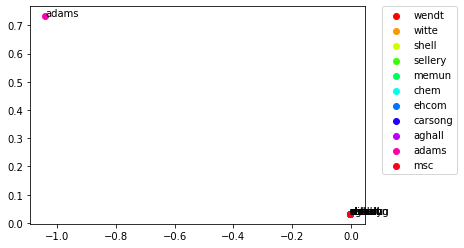

In [10]:
# visualize some
test_indices = [building_names.index('wendt'), building_names.index('witte'), 
                building_names.index('shell'), building_names.index('sellery'), 
                building_names.index('memun'), building_names.index('chem'), 
                building_names.index('ehcom'), building_names.index('carsong'),
                building_names.index('aghall'), building_names.index('adams'),
                building_names.index('msc')]
display_results(test_embeddings, building_names, test_indices)

In [26]:
# Test on scaled dissimilarity matrix with buildings

# import ds matrix
scaled_buildings_ds_mat = np.genfromtxt('scaled_buildings_dissimilarity_mat.csv', delimiter=',')

# normalize data
x, u, s = normalize_data(scaled_buildings_ds_mat)

# train
test2_embeddings = mds_embeddings(x)

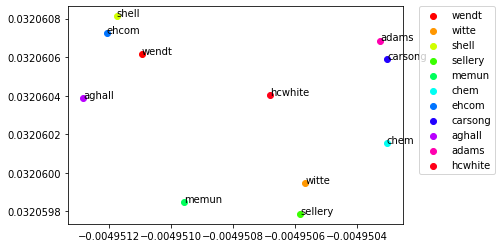

In [31]:
# visualize some
test_indices = [building_names.index('wendt'), building_names.index('witte'), 
                building_names.index('shell'), building_names.index('sellery'), 
                building_names.index('memun'), building_names.index('chem'), 
                building_names.index('ehcom'), building_names.index('carsong'),
                building_names.index('aghall'), building_names.index('adams'),
                building_names.index('hcwhite')]
display_results(test2_embeddings, building_names, test_indices)